Please fill this part


*   Full Name: Matthew Forget
*   Student Number: 212798542

Change file name to yourlast name followed by studentID in the following format and then submit LASTNAME_STUDENTID.ipynb.

Install profiling
https://github.com/ydataai/ydata-profiling

In [1]:
!pip install ydata-profiling
!pip install --upgrade typing-extensions

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 357.9/357.9 kB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 13.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 16.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 293.3/293.3 kB 21.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 26.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 32.4 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=39540576f69000372266749f6772448885567b0a460c08f0713743fa89db052c
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.13.1
    Uninstalling seaborn-0.13.1:
      Successfully uninstalled seaborn-0.13.1




To initiate a session restart, go to Runtime > Restart Session. Occasionally, the impact of installed libraries may not be visible until a restart is performed.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from ydata_profiling import ProfileReport

## Data Transfer: Moving Data from Google Drive to the Current Directory ( 5 pt)
In this section, we will transfer data from Google Drive to the current working directory and Unzip it. Let's assume that the data is located in "/content/drive/MyDrive/HW2/HW2_Data.zip".

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
################################################################################
## TODO: Use Linux command to transfer and unzip data
################################################################################
# zip file location should be :  "/content/drive/MyDrive/HW2/HW2_Data.zip"
# destination directory for unzipping should be  =>  "/content/"
!cp "/content/drive/MyDrive/HW2/HW2_Data.zip" "/content/"
!unzip -q "/content/HW2_Data.zip" -d "/content/"






## Load Data ( 5 pt)
load data in pandas dataframe

In [5]:
################################################################################
## TODO: load and display dataframe
################################################################################
import pandas as pd

df = pd.read_csv('/content/HW2_Data/Heart_Disease_Dataset.csv')

# Display the first few rows of the DataFrame
print(df)





      age  sex  chest pain type  resting bp s  cholesterol  \
0      40    1                2           140          289   
1      49    0                3           160          180   
2      37    1                2           130          283   
3      48    0                4           138          214   
4      54    1                3           150          195   
...   ...  ...              ...           ...          ...   
1185   45    1                1           110          264   
1186   68    1                4           144          193   
1187   57    1                4           130          131   
1188   57    0                2           130          236   
1189   38    1                3           138          175   

      fasting blood sugar  resting ecg  max heart rate  exercise angina  \
0                       0            0             172                0   
1                       0            0             156                0   
2                       0     

## Explore data by ProfileReport ( 5 pt)
https://github.com/ydataai/ydata-profiling

Just simply run ProfileReport in 2 lines

In [6]:
################################################################################
## TODO: Use profiler in 2 line and explore the data
################################################################################
profile = ProfileReport(df, title="Profiling Report")
profile.to_notebook_iframe()


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

## Explore data by Panda ( 5pt )

Shape of the dataset is: (1190, 12)
Missing entries in the dataset columnwise:
age                    0
sex                    0
chest pain type        0
resting bp s           0
cholesterol            0
fasting blood sugar    0
resting ecg            0
max heart rate         0
exercise angina        0
oldpeak                0
ST slope               0
target                 0
dtype: int64
Number of positive cases: 629
Number of negative cases: 561
--------------------- Plots --------------------------


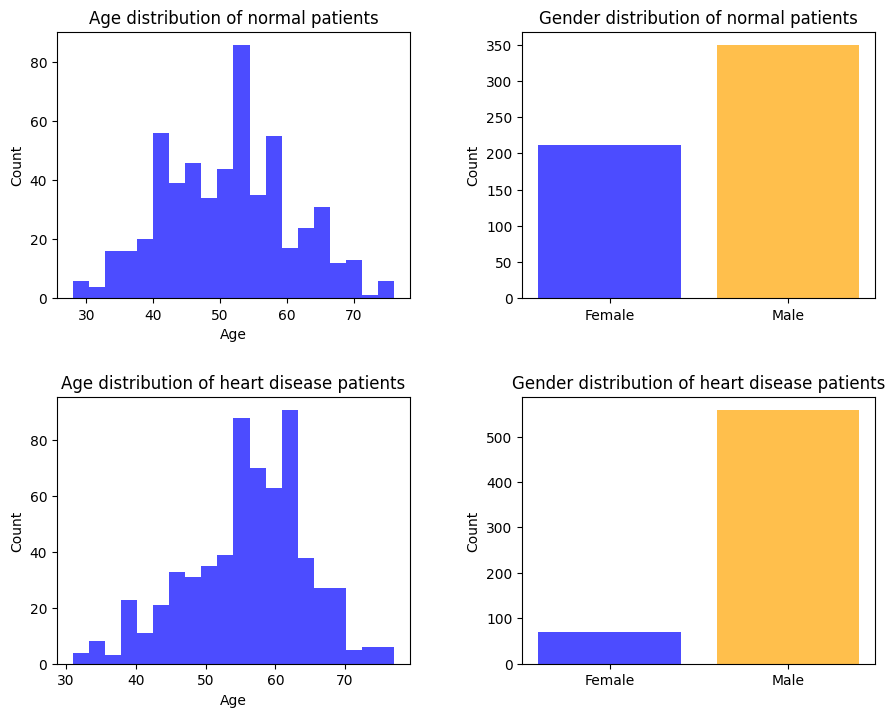

In [7]:
#############################################################################
## TODO: Find the shape of the dataset.
#############################################################################
print("Shape of the dataset is:", df.shape)

#############################################################################
## TODO: Check if there are missing entries in the dataset columnwise.
#############################################################################
print("Missing entries in the dataset columnwise:")
print(df.isnull().sum())

#############################################################################
## TODO: Check number of positive and negative cases
#############################################################################
positive_cases = df['target'].sum()
negative_cases = len(df) - positive_cases
print(f"Number of positive cases: {positive_cases}")
print(f"Number of negative cases: {negative_cases}")

#############################################################################
## TODO: plot  age distribution and gender distribution for both normal
## and heart disease patients. (2*2 plots)
#############################################################################

print("--------------------- Plots --------------------------")
fig, axs = plt.subplots(2, 2, figsize=(10, 8))
fig.tight_layout(pad=5.0)

# Age distribution of normal patients
axs[0, 0].hist(df[df['target'] == 0]['age'], bins=20, color='blue', alpha=0.7)
axs[0, 0].set_title('Age distribution of normal patients')
axs[0, 0].set_xlabel('Age')
axs[0, 0].set_ylabel('Count')

# Gender distribution of normal patients
gender_counts_normal = df[df['target'] == 0]['sex'].value_counts().sort_index()
axs[0, 1].bar(gender_counts_normal.index, gender_counts_normal.values, color=['blue', 'orange'], alpha=0.7)
axs[0, 1].set_title('Gender distribution of normal patients')
axs[0, 1].set_xticks(gender_counts_normal.index)
axs[0, 1].set_xticklabels(['Female', 'Male'])
axs[0, 1].set_ylabel('Count')

# Age distribution of heart disease patients
axs[1, 0].hist(df[df['target'] == 1]['age'], bins=20, color='blue', alpha=0.7)
axs[1, 0].set_title('Age distribution of heart disease patients')
axs[1, 0].set_xlabel('Age')
axs[1, 0].set_ylabel('Count')

# Gender distribution of heart disease patients
gender_counts_hd = df[df['target'] == 1]['sex'].value_counts().sort_index()
axs[1, 1].bar(gender_counts_hd.index, gender_counts_hd.values, color=['blue', 'orange'], alpha=0.7)
axs[1, 1].set_title('Gender distribution of heart disease patients')
axs[1, 1].set_xticks(gender_counts_hd.index)
axs[1, 1].set_xticklabels(['Female', 'Male'])
axs[1, 1].set_ylabel('Count')

# Show plot
plt.show()









## Split Data ( 2 pt )
Before any action you should do this step to prevent from leak of data and using test data in your tunning pipeline

In [8]:
from sklearn.model_selection import train_test_split
#############################################################################
## TODO: split dataframe into 4 dataframe X_train, X_test, y_train, y_test
## test(30%) train(70%)
# Assuming df is your DataFrame and 'target_column' is your target variable
# Split the data into training and testing sets with 0.7 to 0.3 ratio
#############################################################################

X = df.drop('target', axis=1)  # Features (all columns except 'target')
y = df['target']  # Target variable

# Split the data into a 70% training set and a 30% testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Output the shapes of the resulting dataframes
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (833, 11)
X_test shape: (357, 11)
y_train shape: (833,)
y_test shape: (357,)


In [9]:
from sklearn.preprocessing import StandardScaler
#############################################################################
## TODO: Normalize numerical features
## Note that just numerical fetures should be normalized.
## Type of features is determined in dataset description file.
# Create a StandardScaler instance
# Fit to numerical columns of train and transform test and train based on this
## Warning:
## You can't fit your Scaler on whole data. Fit should be just on Train data.
# Print the first few rows to check the result
#############################################################################

numerical_features = ['age', 'resting bp s', 'cholesterol', 'max heart rate', 'oldpeak']  # Example features

# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the scaler on the numerical features of the training data
X_train_scaled = X_train.copy()
X_train_scaled[numerical_features] = scaler.fit_transform(X_train[numerical_features])

# Transform the numerical features of the testing data using the same scaler
X_test_scaled = X_test.copy()
X_test_scaled[numerical_features] = scaler.transform(X_test[numerical_features])

# Print the first few rows to check the result
print(X_train_scaled.head())



#############################################################################
## TODO: just comment name of 2 other scaler form sklearn and write one paragraph for each:
## Your Comment:
# MinMaxScaler: this scaler transforms features by making them fit within a certain range.
# The default is between 0 and 1 but you can make your own range if needed.
# This transformation is often used when you want to normalize the feature set
# without assuming the distribution of the data.
#
# RobustScaler: This scaler is used when the data has outliers. Instead of the median,
# it scales the data according to the quantile range. The median is used later when the
# transform method is used
#
#
##################################################################################


           age  sex  chest pain type  resting bp s  cholesterol  \
996  -1.566106    1                4     -0.757118     0.070043   
852   0.877897    0                4      1.522053    -0.496223   
478   0.771636    1                4     -1.191245    -2.184727   
1004 -1.991150    0                4      0.328202    -0.300604   
875   1.090419    1                3      0.436733     1.264351   

      fasting blood sugar  resting ecg  max heart rate  exercise angina  \
996                     0            0       -0.024287                0   
852                     0            2        0.176820                0   
478                     1            0       -1.311377                1   
1004                    0            0        1.665018                0   
875                     0            0        0.699701                0   

       oldpeak  ST slope  
996   0.288497         2  
852   4.894054         3  
478   1.025386         3  
1004  0.472719         1  
875  -0.816

### plot correlations ( 2 pt)

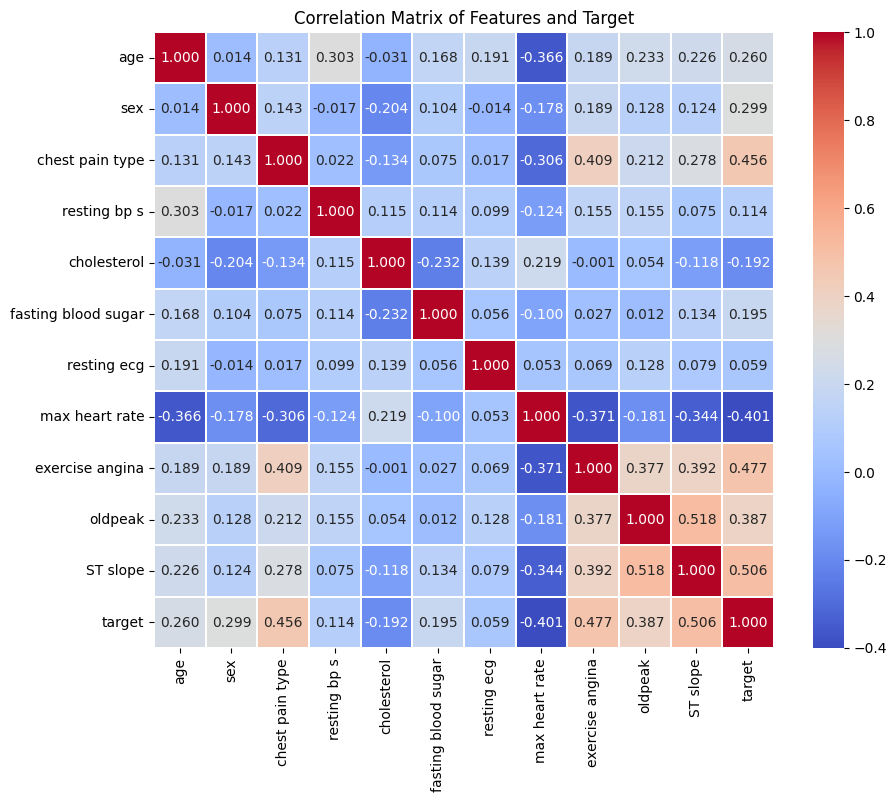

In [10]:
#############################################################################
## TODO: Make a temp dataframe with X_train and y_train.
## plot correlation between all features
#############################################################################
temp_df = X_train_scaled.copy()
temp_df['target'] = y_train

# Calculate the correlation matrix
corr = temp_df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))  # Set the figure size for better readability
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".3f", linewidths=.05)
plt.title('Correlation Matrix of Features and Target')
plt.show()

## Define a classification report function ( 3 pt)


In [11]:
#############################################################################
## TODO: Complete this function by considering function description
## Note: write every thing from scatch with python or numpy operators
#############################################################################

def classification_report(y_true, y_pred):


    """
    Calculate classification metrics based on true and predicted labels.

    Parameters:
    - y_true: Array of true labels (0 or 1).
    - y_pred: Array of predicted labels (0 or 1).

    Returns:
    - Accuracy: Ratio of correct predictions to total samples.
    - Precision: Accuracy of positive predictions among all predicted positives.
    - Recall: Ability to capture actual positives among all actual positives.
    - F1 Score: Harmonic mean of precision and recall, balancing both metrics.
    - FNR: Proportion of actual positives incorrectly predicted as negatives.
    """

################### Complete this part###############################

    y_true = np.array(y_true)
    y_pred = np.array(y_pred)

    # True positives, false positives, true negatives, false negatives
    TP = np.sum((y_true == 1) & (y_pred == 1))
    FP = np.sum((y_true == 0) & (y_pred == 1))
    TN = np.sum((y_true == 0) & (y_pred == 0))
    FN = np.sum((y_true == 1) & (y_pred == 0))

    # Metrics calculation
    Accuracy = (TP + TN) / (TP + FP + TN + FN)
    Precision = TP / (TP + FP) if (TP + FP) != 0 else 0
    Recall = TP / (TP + FN) if (TP + FN) != 0 else 0
    F1score = 2 * (Precision * Recall) / (Precision + Recall) if (Precision + Recall) != 0 else 0
    FNR = FN / (FN + TP) if (FN + TP) != 0 else 0

####################################################################


    result = {
        'Accuracy:' : Accuracy,
        'Precision:' : Precision,
        'Recall:' : Recall,
        'F1score:': F1score,
        'FNR:': FNR

    }

    return result


# Test function





# Test Case 1: Perfect predictions
y_true_1 = [1, 0, 1, 0]
y_pred_1 = [1, 0, 1, 0]
result_1 = classification_report(y_true_1, y_pred_1)
print(result_1)


# Test Case 2: Imperfect predictions
y_true_2 = [1, 0, 1, 0]
y_pred_2 = [0, 1, 1, 1]

result_2 = classification_report(y_true_2, y_pred_2)
print(result_2)





{'Accuracy:': 1.0, 'Precision:': 1.0, 'Recall:': 1.0, 'F1score:': 1.0, 'FNR:': 0.0}
{'Accuracy:': 0.25, 'Precision:': 0.3333333333333333, 'Recall:': 0.5, 'F1score:': 0.4, 'FNR:': 0.5}


## Model Traning

### Covert data to numpy ( 2 pt)

In [12]:
#############################################################################
## TODO: convert X_train, X_test, y_train, y_test to numpy array
#############################################################################
X_train_np = np.array(X_train)
X_test_np = np.array(X_test)
y_train_np = np.array(y_train)
y_test_np = np.array(y_test)

### Train Logistic Regression ( 5pt)

{'Accuracy:': 0.8571428571428571, 'Precision:': 0.8725490196078431, 'Recall:': 0.8768472906403941, 'F1score:': 0.8746928746928747, 'FNR:': 0.12315270935960591}


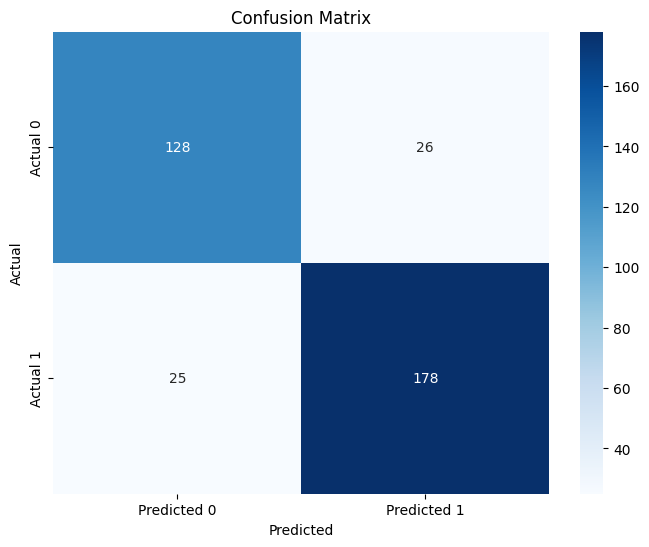

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
#############################################################################
## TODO: Train a Logistic Regression Model and test your model.
## give a test report from test result by above classification_report function
## Plot the confusion matrix using seaborn
#############################################################################

# I have to increase the number of iterations because the default was not enough
logreg = LogisticRegression(max_iter=1000)

# Fit the model on the training data
logreg.fit(X_train_np, y_train_np)

# Predict the labels of the test set
y_pred = logreg.predict(X_test_np)

# Evaluate the model
report = classification_report(y_test_np, y_pred)
print(report)

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test_np, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

### Train KNN ( 5pt)

{'Accuracy:': 0.8403361344537815, 'Precision:': 0.8443396226415094, 'Recall:': 0.8817733990147784, 'F1score:': 0.8626506024096386, 'FNR:': 0.11822660098522167}


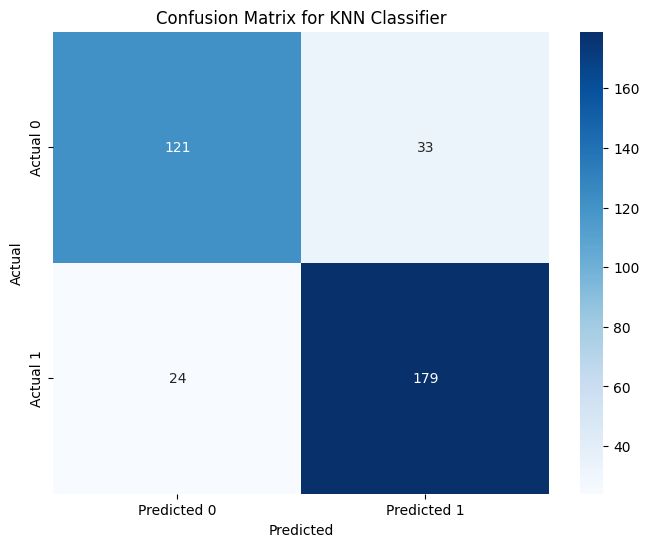

In [14]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

#############################################################################
## TODO: Train a KNN Model and test your model.
## give a test report from test result by above classification_report function
## plot confusion matrix
#############################################################################
neigh = KNeighborsClassifier(n_neighbors=5)

# Fit the model on the training data
neigh.fit(X_train_scaled, y_train_np)

# Predict the labels of the test set
y_pred_neigh = neigh.predict(X_test_scaled)

# Evaluate the model using the custom classification report
report_neigh = classification_report(y_test_np, y_pred_neigh)
print(report_neigh)

# Compute confusion matrix
conf_matrix_neigh = confusion_matrix(y_test_np, y_pred_neigh)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_neigh, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix for KNN Classifier')
plt.show()

### Train a safer model ( 3pt)

To make sure our model doesn't make dangerous mistakes, like saying a high-risk patient is healthy, we can use the class_weight option in LogisticRegression(). If the model wrongly thinks a healthy person is high-risk, it's not as big of a problem and doctors will check it!

Accuracy: 0.7366946778711485
{'Accuracy:': 0.7366946778711485, 'Precision:': 0.6860068259385665, 'Recall:': 0.9901477832512315, 'F1score:': 0.8104838709677419, 'FNR:': 0.009852216748768473}


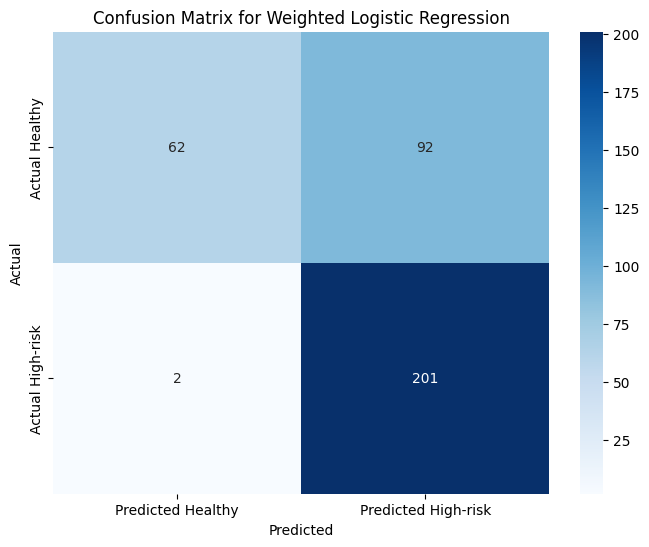

In [15]:
#############################################################################
## TODO: create a safer model with class_weight use your own weight, result is not important
## plot confusion matrix
#############################################################################
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score,roc_curve

# I chose to weight a positive (1) 10 times more than a negative
class_weights = {0: 1, 1: 10}

logreg_weighted = LogisticRegression(class_weight=class_weights)

logreg_weighted.fit(X_train_scaled, y_train_np)

y_pred_weighted = logreg_weighted.predict(X_test_scaled)

accuracy_weighted = accuracy_score(y_test_np, y_pred_weighted)
print(f"Accuracy: {accuracy_weighted}")

report_weighted = classification_report(y_test_np, y_pred_weighted)
print(report_weighted)

conf_matrix_weighted = confusion_matrix(y_test_np, y_pred_weighted)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_weighted, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Healthy', 'Predicted High-risk'], yticklabels=['Actual Healthy', 'Actual High-risk'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix for Weighted Logistic Regression')
plt.show()

### Cross Validation Score ( 5pt)

In [16]:
from sklearn.model_selection import cross_validate
#############################################################################
## TODO: research  about "K-Fold cross validation"
## cross validate your KNN model to evaluate your model better
## use accuracy and recall to report cross validation results
#############################################################################
neigh = KNeighborsClassifier(n_neighbors=5)

cv_results = cross_validate(neigh, X_train_scaled, y_train_np, cv=10,
                            scoring=['accuracy', 'recall'],
                            return_train_score=False)

print(f"CV Accuracy: {np.mean(cv_results['test_accuracy']):.3f} ± {np.std(cv_results['test_accuracy']):.3f}")
print(f"CV Recall: {np.mean(cv_results['test_recall']):.3f} ± {np.std(cv_results['test_recall']):.3f}")




CV Accuracy: 0.851 ± 0.043
CV Recall: 0.862 ± 0.043


### Hyperparameter Tuning Using GridSearchCV ( 5pt)

In [17]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
#############################################################################
## TODO: Explore GridSearchCV functionality to identify the best parameters
## (n_neighbors, weights, p) for your KNN model.
#############################################################################

neigh = KNeighborsClassifier()

# These are the parameters to be chnged by GridSearchCV
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}

# Initialize GridSearchCV with cross validation 5 this time
grid_search = GridSearchCV(neigh, param_grid, cv=5, scoring='accuracy', return_train_score=True)

# Fit GridSearchCV
grid_search.fit(X_train_scaled, y_train_np)

# Best parameters and best score
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)


Best parameters: {'n_neighbors': 11, 'p': 1, 'weights': 'distance'}
Best score: 0.9063776062333165


In [18]:
#############################################################################
## TODO: Retrieve the best model and its parameters
#############################################################################

print("Best Parameters:", grid_search.best_params_)

print("Best Model:", grid_search.best_estimator_)



Best Parameters: {'n_neighbors': 11, 'p': 1, 'weights': 'distance'}
Best Model: KNeighborsClassifier(n_neighbors=11, p=1, weights='distance')


### Cross Validation Score on Result of Grid Search ( 2pt)

In [19]:
#############################################################################
## TODO: Do again "K-Fold cross validation" on best KNN model of the Gride Search
#############################################################################

# Set the parameters to the best ones from GridSearchCV
neigh = KNeighborsClassifier(n_neighbors=11, p=1, weights='distance')

cv_results = cross_validate(neigh, X_train_scaled, y_train_np, cv=10,
                            scoring=['accuracy', 'recall'],
                            return_train_score=False)

print(f"CV Accuracy: {np.mean(cv_results['test_accuracy']):.3f} ± {np.std(cv_results['test_accuracy']):.3f}")
print(f"CV Recall: {np.mean(cv_results['test_recall']):.3f} ± {np.std(cv_results['test_recall']):.3f}")


CV Accuracy: 0.911 ± 0.037
CV Recall: 0.920 ± 0.037


### Is the aforementioned KNN model (Best KNN) fair? ( 3 pt)
Evaluate that model perform equally on men and women or not.

In [23]:
#############################################################################
## TODO: split your test data on two split of women and men and give
## classification_report on them.
#############################################################################


#############################################################################
## TODO: write a comment and explain the result of this section in one paragraph.
## Why FNR in this dataset is important? And probably why this gap between men
## and women FNR happens
# Your Comment:
#
#
#
#
#
#
#
#
#
#
#############################################################################

KeyError: "None of [Int64Index([ 260,  984,  752, 1131,  715,  790,  675,  323,  727,  631, 1140,\n              54,  270,  716,  626,  908,  233,  275,  289,  128, 1143, 1049,\n            1125,  861,   51, 1181,  621,  717,  917, 1000,  735,  755, 1087,\n            1081,  730, 1121,  163,  286,  894,  244,   10,  688,  753,  785,\n             618,  968,  306,  666,  812,  798,  832,  893,  823,  644,   39,\n             136,    3, 1022,  853,  292,   66,  732, 1109,  678,    6, 1013,\n            1147,  978, 1039,  256,  376,  106,   55,  120],\n           dtype='int64')] are in the [columns]"

### Ensemble Leanrning ( 10 pt)

First read the first part of this blog
https://rasbt.github.io/mlxtend/user_guide/classifier/StackingCVClassifier/

In [26]:
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from mlxtend.classifier import StackingCVClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics


#############################################################################
## TO-DO: Implement a Stacking Classifier Ensemble for Model Selection
## 1. Utilize a Logistic Regression, the best K-Neighbors Classifier,
##    Support Vector Machine (SVM), Soft-margin SVM, Decision Tree,
##    Random Forest, and Naive Bayes as base classifiers.
## 2. Designate a Logistic Regression as the Meta-Classifier.
## 3. Utilize 3-fold cross-validation for model evaluation.
## 4. Assess models' performance on the test set.
#############################################################################

# Part 1: Classifers
RANDOM_SEED = 42
ens_knn = KNeighborsClassifier(n_neighbors=11, p=1, weights='distance')
ens_svc = SVC(kernel='linear', probability=True)
ens_soft_svc = SVC(kernel='rbf', probability=True)
ens_dt = DecisionTreeClassifier()
ens_rf = RandomForestClassifier(random_state=RANDOM_SEED)
ens_nb = GaussianNB()

# Part 2: meta classifier
ens_lr_meta = LogisticRegression()

# Part 3: utilizing a 3-fold CV for model evaluation
stacking_ens = StackingCVClassifier(classifiers=[ens_knn, ens_svc, ens_soft_svc, ens_dt, ens_rf, ens_nb],
                                    meta_classifier=ens_lr_meta,
                                    use_probas=True,
                                    random_state=RANDOM_SEED,
                                    cv=3)
stacking_ens.fit(X_train_scaled, y_train_np)

# Part 4: assess models performance
cv_scores = model_selection.cross_val_score(stacking_ens, X_train_scaled, y_train_np, cv=3, scoring='accuracy')
print(f"CV Accuracy: {np.mean(cv_scores):.3f} ± {np.std(cv_scores):.3f}")

y_pred = stacking_ens.predict(X_test_scaled)

accuracy = metrics.accuracy_score(y_test_np, y_pred)
print(f"Test Set Accuracy: {accuracy:.3f}")

report = classification_report(y_test_np, y_pred)
print(report)

CV Accuracy: 0.884 ± 0.019
Test Set Accuracy: 0.930
{'Accuracy:': 0.9299719887955182, 'Precision:': 0.9362745098039216, 'Recall:': 0.9408866995073891, 'F1score:': 0.9385749385749386, 'FNR:': 0.059113300492610835}


### ROC ( 10 pt)
read about AUC ROC form this link:
https://medium.com/greyatom/lets-learn-about-auc-roc-curve-4a94b4d88152
and plot ROC Curve for ensembel model.

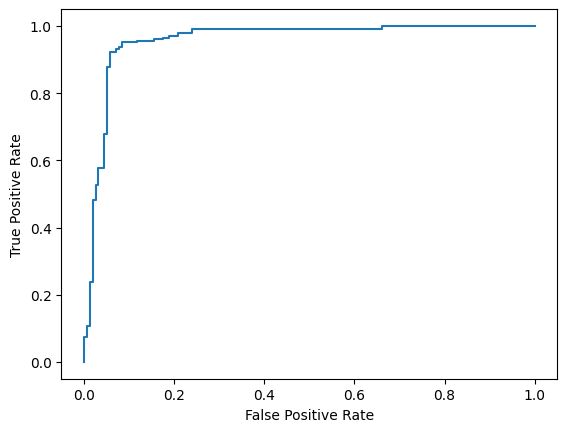

In [28]:
from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay

#############################################################################
## TODO: plot roc_curve for Ensemble model you created previously
#############################################################################

y_prob = stacking_ens.predict_proba(X_test_scaled)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test_np, y_prob)
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()





#############################################################################
## TODO: what this plot can show us that other metrics like Accuracy can't:
## Your Comment:
# I think that ROC can show us the trade off between precision and recall,
# but accuraccy only shows us how many true positives there are true negatives
#
#
#
#############################################################################